In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('HousePrice.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df =df.drop('Id', axis =1) #drop the 'Id' feature

#### Let us first look at the columns which are having more than 50% missing values and we will try to drop them

In [7]:
missing  = df.isna().sum() / len(df) 

dropping = missing.loc[missing >0.50]

df = df.drop(dropping.index , axis = 1)

In [8]:
X = df.drop('SalePrice', axis = 1)
Y = df['SalePrice']

##### Let us split the data into train and test data

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size = 0.20, random_state = 20)

x_train.shape, x_test.shape

((1168, 75), (292, 75))

In [10]:
num_features = [col for col in X.columns if X[col].dtypes != 'O']

Year_features = [col for col in num_features if 'Yr'  in col or 'Year' in col]

discrete_features = [col for col in num_features if (len(X[col].unique())<25) and col not in Year_features]

continuous_features = [col for col in num_features if (col not in Year_features) and (col not in discrete_features)]

Categorical_features = [col for col in X.columns if X[col].dtypes == 'O']

### Now, let us define few functions to clean and prepare the data

1. Handling the missing values
2. Encoding the Categorical values
3. Handling Skewed data - log transformations
4. Handling Outliers
5. Feature scaling 

In [11]:
#Handling missing values

def filling_missingvalues(x):
    for col in num_features:
        if col in continuous_features or Year_features:
            median = x[col].median()
            x.loc[x[col].isnull(), col] = median
                
        elif col in discrete_features:
            x.loc[x[col].isnull(), col] = x[col].mode()[0] 
    for col in Categorical_features:
        x.loc[x[col].isnull(), col] = 'Missing'
        
    return x

In [12]:
x_train = filling_missingvalues(x_train)

C:\Users\vskis\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
x_train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

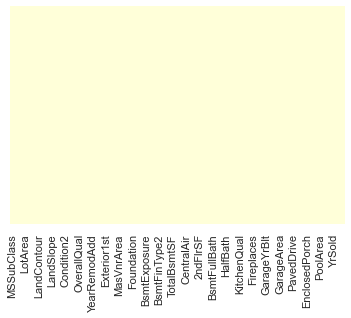

In [14]:
#checking whether if we are having any missing values
import seaborn as sns
sns.set()

sns.heatmap(x_train.isnull(), yticklabels = False, cbar = False, cmap = 'YlGnBu')

In [15]:
x_test = filling_missingvalues(x_test)
x_test.isna().sum()

C:\Users\vskis\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

#### 2. Encoding the categorical values

Before going to encode the categorical values, we will handle the rare labels

In [16]:
for col in Categorical_features:
    temp = df.groupby(col)['SalePrice'].count()/ len(df)
    temp_df = temp[temp> 0.01].index
    
    x_train[col] = np.where(x_train[col].isin(temp_df), x_train[col], 'Rare_var')
    x_test[col] = np.where(x_test[col].isin(temp_df), x_test[col], 'Rare_var')

<ipython-input-16-51078a470acd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = np.where(x_train[col].isin(temp_df), x_train[col], 'Rare_var')
<ipython-input-16-51078a470acd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = np.where(x_test[col].isin(temp_df), x_test[col], 'Rare_var')


In [17]:
x_train = pd.get_dummies(x_train, drop_first = True)

In [18]:
x_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Rare_var,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_var
1137,50.0,54.0,6342.0,5.0,8.0,1875.0,1996.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
1335,20.0,80.0,9650.0,6.0,5.0,1977.0,1977.0,360.0,686.0,0.0,...,1,0,1,0,0,1,0,1,0,0
459,50.0,68.0,7015.0,5.0,4.0,1950.0,1950.0,161.0,185.0,0.0,...,1,0,1,0,0,1,0,1,0,0
115,160.0,34.0,3230.0,6.0,5.0,1999.0,1999.0,1129.0,419.0,0.0,...,1,0,1,0,0,1,0,1,0,0
908,20.0,68.0,8885.0,5.0,5.0,1983.0,1983.0,0.0,301.0,324.0,...,1,0,1,0,0,1,0,1,0,0


In [19]:
#let us drop if any duplicate features are present
x_train.drop_duplicates()
x_train.shape

(1168, 192)

In [20]:
x_test = pd.get_dummies(x_test, drop_first = True)

x_test.shape

(292, 188)

### As we can observe that the categorical labels in the test and train data are different so we need to encode the whole data first then we can split the data

In [21]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [22]:
#handle the missing values
df = filling_missingvalues(df)

#handle the rare labels
for col in Categorical_features:
    temp = df.groupby(col)['SalePrice'].count()/ len(df)
    temp_df = temp[temp> 0.01].index
    
    df[col] = np.where(df[col].isin(temp_df), df[col], 'Rare_var')

In [23]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000


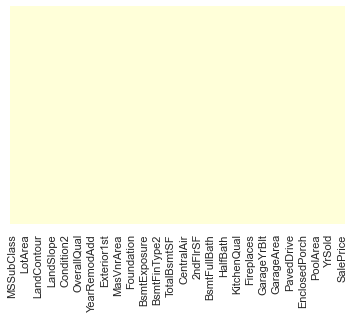

In [24]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'YlGnBu')

In [25]:
#now encode the categorical features

df = pd.get_dummies(df, drop_first = True)
df.shape

(1460, 198)

Observe that now didn't miss any categorical label and try to drop the duplicates if any

In [26]:
#dropping duplicates if any

df.drop_duplicates()
df.shape

(1460, 198)

In [27]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df[feature]=df['YrSold']-df[feature]

### 3. Handling the skewed data by using log transformations

In [28]:
#As we saw earlier in EDA that only four continuous variables are skewed which can be treated

for col in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea' ]:
    df[col] = np.log(df[col])

df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Rare_var,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_var
0,60.0,4.174387,9.041922,7.0,5.0,5.0,5.0,196.0,706.0,0.0,...,1,0,1,0,0,1,0,1,0,0
1,20.0,4.382027,9.169518,6.0,8.0,31.0,31.0,0.0,978.0,0.0,...,1,0,1,0,0,1,0,1,0,0
2,60.0,4.219508,9.328123,7.0,5.0,7.0,6.0,162.0,486.0,0.0,...,1,0,1,0,0,1,0,1,0,0
3,70.0,4.094345,9.164296,7.0,5.0,91.0,36.0,0.0,216.0,0.0,...,1,0,1,0,0,1,0,0,0,0
4,60.0,4.430817,9.565214,8.0,5.0,8.0,8.0,350.0,655.0,0.0,...,1,0,1,0,0,1,0,1,0,0


#### Now let us split the data and scale it


In [29]:
dependent = df.drop('SalePrice', axis = 1)
independent = df['SalePrice']

In [30]:
train_x, test_x, train_y , test_y = train_test_split(dependent, independent, test_size =0.2, random_state = 23)
train_x.shape , test_x.shape , train_y.shape , test_y.shape

((1168, 197), (292, 197), (1168,), (292,))

#### Scaling the data

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

train_x = pd.DataFrame(train_x, columns = dependent.columns)
test_x = pd.DataFrame(test_x, columns = dependent.columns)

### Feature selection: using lasso

In [32]:
from sklearn.linear_model import Lasso, LinearRegression

from sklearn.feature_selection import SelectFromModel

feat = SelectFromModel(Lasso(alpha = 100, random_state = 0)).fit(train_x, train_y)

train_x = train_x[train_x.columns[feat.get_support()]]

test_x = test_x[test_x.columns[(feat.get_support())]]

train_x.shape , test_x.shape

((1168, 109), (292, 109))

### predictions using some models:

In [33]:
# LinearRegression model

linRe = LinearRegression()

linRe.fit(train_x, train_y)

ypred = linRe.predict(test_x)

In [34]:
#let us look at the metrics 

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(ypred, test_y)

rmse = np.sqrt(mse)

rmse

62031.8879857747

In [35]:
# DecisionTreeRegressor model

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(train_x, train_y)

ypred1 = dtr.predict(test_x)

mse1 = mean_squared_error(ypred1, test_y)

rmse1 = np.sqrt(mse1)

rmse1

104840.40676782568

In [36]:
# RandomForestRegressor model

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

ypred2 = rf.predict(test_x)

mse2 = mean_squared_error(ypred2, test_y)

rmse2 = np.sqrt(mse2)

rmse2

78187.90291342884

In [37]:
# XGBRegressor model

from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(train_x, train_y)

ypred3 = xgb.predict(test_x)

mse3 = mean_squared_error(ypred3, test_y)

rmse3 = np.sqrt(mse3)

rmse3

79741.44034975542

In [38]:
# Support Vector Regressor model

from sklearn.svm import SVR

svr = SVR()
svr.fit(train_x, train_y)

ypred4 = svr.predict(test_x)

mse4 = mean_squared_error(ypred4, test_y)

rmse4 = np.sqrt(mse4)

rmse4

71995.99018194812

#### Hyperparameter tuning :

Let us look at the RandomForestRegressor and XGBRegressor. They can perform well if we tune the model

In [40]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators' : [10,50,100,200,300,500],
             'max_depth': [3,5,10,None],
             'max_features' : ["auto", "sqrt", "log2"],
             'bootstrap': [True, False]}

Rscv = RandomizedSearchCV(rf, param_grid,scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1, random_state = 5, return_train_score = True)

Rscv.fit(train_x, train_y)

print(Rscv.best_params_)
print(Rscv.best_score_)
print(Rscv.best_estimator_)

{'n_estimators': 300, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
-955370733.8141474
RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300)


**Observe that these are best parameters that we can pass through the RandomForestRegressor**

In [45]:
# We can observe the results of this tuning 

pd.DataFrame(Rscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.801040,0.025075,0.069478,0.009760,300,log2,10,False,"{'n_estimators': 300, 'max_features': 'log2', ...",-8.834374e+08,...,-1.815180e+08,-1.827054e+08,-1.922523e+08,-1.856984e+08,-1.845259e+08,-1.810629e+08,-1.873249e+08,-1.949020e+08,-1.868381e+08,4.477704e+06
1,0.802768,0.088463,0.040930,0.014970,200,sqrt,3,False,"{'n_estimators': 200, 'max_features': 'sqrt', ...",-1.631389e+09,...,-1.774239e+09,-1.845957e+09,-1.859610e+09,-1.878524e+09,-1.802107e+09,-1.897124e+09,-1.877950e+09,-1.845935e+09,-1.843820e+09,3.572338e+07
2,3.338201,0.302973,0.128422,0.011091,500,log2,10,True,"{'n_estimators': 500, 'max_features': 'log2', ...",-8.973551e+08,...,-3.246984e+08,-3.504780e+08,-3.466864e+08,-3.536848e+08,-3.432211e+08,-3.451648e+08,-3.465161e+08,-3.494741e+08,-3.449769e+08,8.054353e+06
3,2.742662,0.124860,0.091519,0.025220,300,log2,None,False,"{'n_estimators': 300, 'max_features': 'log2', ...",-7.822289e+08,...,-9.525848e+01,-1.478113e+02,-1.160822e+02,-1.713434e+02,-1.297613e+02,-1.367653e+02,-3.034168e+02,-7.270680e+01,-1.625890e+02,8.036845e+01
4,4.136069,0.180927,0.049424,0.008285,200,auto,5,False,"{'n_estimators': 200, 'max_features': 'auto', ...",-1.856396e+09,...,-9.672649e+08,-1.010719e+09,-1.021379e+09,-1.011257e+09,-9.761891e+08,-1.007887e+09,-9.808347e+08,-9.643595e+08,-9.929341e+08,2.007930e+07
5,0.059100,0.008842,0.014192,0.013310,10,log2,3,True,"{'n_estimators': 10, 'max_features': 'log2', '...",-2.086345e+09,...,-2.286124e+09,-2.255885e+09,-2.133211e+09,-2.506767e+09,-2.275684e+09,-2.601181e+09,-2.350639e+09,-2.454180e+09,-2.373747e+09,1.320769e+08
6,2.869748,0.058399,0.085124,0.010090,300,sqrt,None,True,"{'n_estimators': 300, 'max_features': 'sqrt', ...",-7.854426e+08,...,-1.305754e+08,-1.416486e+08,-1.322828e+08,-1.431227e+08,-1.414487e+08,-1.452959e+08,-1.402858e+08,-1.361438e+08,-1.376126e+08,5.636696e+06
7,6.791008,0.054587,0.110165,0.009048,500,auto,3,False,"{'n_estimators': 500, 'max_features': 'auto', ...",-2.268528e+09,...,-1.708086e+09,-1.728462e+09,-1.781782e+09,-1.737334e+09,-1.737137e+09,-1.755770e+09,-1.773279e+09,-1.720115e+09,-1.742478e+09,2.942013e+07
8,0.075302,0.004840,0.010644,0.007208,10,log2,10,True,"{'n_estimators': 10, 'max_features': 'log2', '...",-1.122345e+09,...,-3.671080e+08,-4.716918e+08,-4.593894e+08,-4.208500e+08,-3.974414e+08,-4.877153e+08,-4.238099e+08,-4.938762e+08,-4.453805e+08,3.922168e+07
9,8.469025,0.221402,0.064312,0.005798,300,auto,10,True,"{'n_estimators': 300, 'max_features': 'auto', ...",-1.000033e+09,...,-1.778352e+08,-1.906891e+08,-1.790132e+08,-1.820389e+08,-1.821968e+08,-1.921241e+08,-1.786493e+08,-1.876273e+08,-1.835459e+08,5.308078e+06


In [46]:
#we got the best parameters to get the better results using 'hyparameter tuning'

tuned_rf = RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300)
tuned_rf.fit(train_x, train_y)
tuned_rf_pred = tuned_rf.predict(test_x)

tuned_rf_rmse = np.sqrt(mean_squared_error(test_y, tuned_rf_pred))
tuned_rf_rmse

40970.06108135887

#### Observe that we got the better results compared to the normal model. But, let us have a look at the XGBRegressor model too

In [47]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

random_cv = RandomizedSearchCV(estimator=xgb,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv.fit(train_x, train_y)

print(random_cv.best_params_)
print(random_cv.best_score_)
print(random_cv.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  4.7min finished


{'n_estimators': 900, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.1, 'booster': 'gbtree', 'base_score': 0.25}
-16962.527445944983
XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [49]:
pd.DataFrame(random_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_booster,param_base_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.094123,0.329635,0.012461,6.231158e-03,1500,1,15,0.2,gblinear,0.75,...,-38238.995491,2606.582462,48,-37227.653716,-37371.031534,-38329.621688,-38948.511832,-37893.838812,-37954.131516,632.644588
1,4.650662,0.261173,0.014589,8.052941e-03,1100,4,3,0.1,gbtree,1,...,-18065.272815,1455.685094,6,-2305.912712,-2300.442657,-2257.627555,-2424.774281,-2361.355594,-2330.022560,57.718177
2,0.777753,0.066925,0.009965,4.416411e-03,500,4,10,0.1,gblinear,0.75,...,-38132.909836,2616.666148,32,-37125.691799,-37275.993459,-38227.560677,-38833.747869,-37790.568357,-37850.712432,627.367101
3,16.141466,0.425131,0.032164,1.843452e-03,900,4,15,0.05,gbtree,0.5,...,-18814.249280,1572.834151,13,-36.348054,-52.669336,-17.074616,-22.443813,-28.209542,-31.349072,12.429512
4,4.263233,0.317753,0.013249,3.078309e-03,1500,3,2,0.15,gbtree,0.25,...,-17531.565613,1683.380627,3,-3634.761781,-3797.496755,-3863.000824,-3881.442952,-3849.272059,-3805.194874,89.671395
5,0.190281,0.008568,0.012351,4.296407e-03,100,1,15,0.2,gblinear,0.75,...,-37403.780243,2690.712900,27,-36391.908692,-36602.181352,-37506.945881,-38047.622335,-37106.448095,-37131.021271,601.338462
6,4.210026,0.228194,0.012610,6.308684e-03,1500,3,2,0.2,gbtree,1,...,-17948.254760,1579.550495,5,-2637.781283,-2807.736751,-2849.663686,-3009.113712,-2854.005323,-2831.660151,118.721982
7,6.692880,0.579933,0.015622,4.862804e-07,500,4,10,0.1,gbtree,1,...,-18807.333460,1430.084596,12,-100.363942,-70.494680,-5.251832,-27.293938,-4.819109,-41.644700,37.859689
8,2.591795,0.118951,0.016264,5.872869e-04,900,1,2,0.1,gbtree,0.25,...,-16962.527446,1238.870045,1,-7209.473300,-6925.267699,-7149.048192,-7414.318244,-7025.610846,-7144.743656,166.877941
9,18.126869,0.990974,0.020075,5.767644e-03,900,3,15,0.1,gbtree,0.25,...,-18884.780911,1468.982015,14,-0.050133,-0.103336,-0.123319,-0.066661,-0.047711,-0.078232,0.030060


In [52]:
# We got the best parameters that we could pass in XGBRegressor. Let us look at the results

tuned_xgb = XGBRegressor( booster='gbtree', gamma=0,
             learning_rate=0.1,  max_depth=2,
             min_child_weight=1,
             n_estimators=900, random_state=0)

tuned_xgb.fit(train_x, train_y)
tuned_xgb_pred = tuned_xgb.predict(test_x)

tuned_xgb_rmse = np.sqrt(mean_squared_error(test_y, tuned_xgb_pred))
tuned_xgb_rmse

80131.07229317601

### Now, we could say that the Tuned RandomForestRegressor performs well

In [53]:
from sklearn.metrics import mean_absolute_error, r2_score


print('The best model RandomForestRegressor Metrics :')
print('mean_absolute_error : ', mean_absolute_error(test_y, tuned_rf_pred))
print('Root Mean Squared Error : ', tuned_rf_rmse)
print('r2_score:', r2_score(test_y, tuned_rf_pred))

The best model RandomForestRegressor Metrics :
mean_absolute_error :  33261.52376712328
Root Mean Squared Error :  40970.06108135887
r2_score: 0.6670855369712836
